
# 最近鄰居分類(Nearest Neighbors Classification)

在圖型識別領域中，最近鄰居法（KNN演算法，又譯K-近鄰演算法）是一種用於分類和迴歸的無母數統計方法。最近鄰居法採用向量空間模型來分類，概念為相同類別的案例，彼此的相似度高，而可以藉由計算與已知類別案例之相似度，來評估未知類別案例可能的分類。是一種基於實例的學習，或者是局部近似和將所有計算推遲到分類之後的惰性學習。

在這兩種情況下，輸入包含特徵空間（Feature Space）中的k個最接近的訓練樣本。
在k-NN分類中，輸出是一個分類族群。一個物件的分類是由其鄰居的「多數表決」確定的，k個最近鄰居（k為正整數，通常較小）中最常見的分類決定了賦予該物件的類別。若k = 1，則該物件的類別直接由最近的一個節點賦予。
在k-NN迴歸中，輸出是該物件的屬性值。該值是其k個最近鄰居的值的平均值，也可以選擇使較近鄰居有較大權重。

鄰居都取自一組已經正確分類（在迴歸的情況下，指屬性值正確）的物件。雖然沒要求明確的訓練步驟，但這也可以當作是此演算法的一個訓練樣本集。

k-近鄰演算法的缺點是對資料的局部結構非常敏感。
下面的實例使用最近鄰居分類，會畫出各類別間的決策邊界。

In [3]:
#導入需要用到的套件 
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

Automatically created module for IPython interactive environment


### 參數選擇
在KNN分類中，k是一個用戶定義的常數。一個沒有類別標籤的向量（查詢或測試點）將被歸類為最接近該點的k個樣本點中最頻繁使用的一類。其中
如何選擇一個最佳的K值取決於資料。一般情況下，在分類時較大的K值能夠減小噪聲的影響，但會使類別之間的界限變得模糊。一個較好的K值能通過各種啟發式技術（見超參數最佳化）來取得。

In [4]:
# 載入鳶尾花資料集，只用前兩個特徵值
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

h = .02  # 設定網格間隔
n_neighbors = 15 # 設定k參數  抓最近的15個鄰居

<ipython-input-5-dd198cc6df35>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-5-dd198cc6df35>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


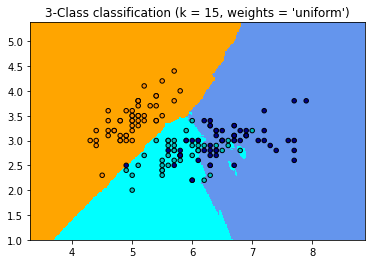

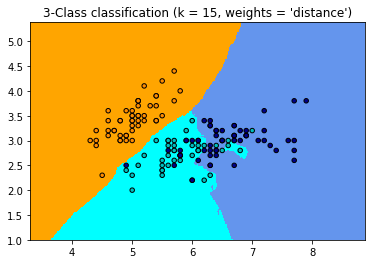

In [5]:
# 產生帶顏色的圖
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:   #一次訓練兩個模型
    # 產生近鄰分類器並用資料進行訓練`,uniform是對k個點取相同權重；distance則按距離近遠加權(越近的權重越高)    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # 畫出決策邊界(decision boundary)，同時也幫網格點 [x_min, x_max]x[y_min, y_max]上色
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 將預測結果上顏色
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # 幫訓練點上色
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

#KNN 訓練出的分類不一定連續在同一個區域

<ipython-input-6-f7f24f53d6e2>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-6-f7f24f53d6e2>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


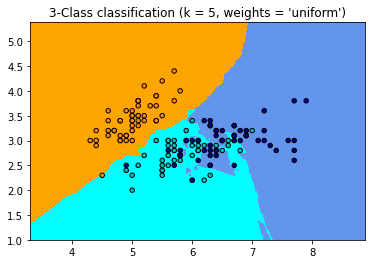

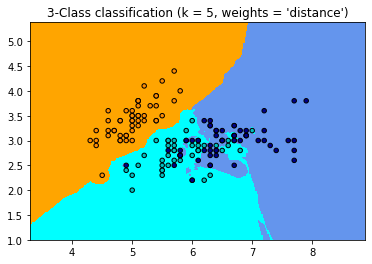

In [6]:
n_neighbors = 5
# 產生帶顏色的圖
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # 產生近鄰分類器並用資料進行訓練`,uniform是對k個點取相同權重；distance則按距離近遠加權(越近的權重越高)    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # 畫出決策邊界(decision boundary)，同時也幫網格點 [x_min, x_max]x[y_min, y_max]上色
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 將預測結果上顏色
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

<ipython-input-7-0f2c1fefbd87>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
<ipython-input-7-0f2c1fefbd87>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


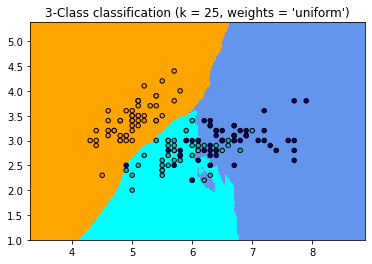

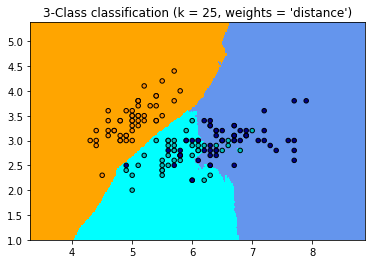

In [7]:
n_neighbors = 25
# 產生帶顏色的圖
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # 產生近鄰分類器並用資料進行訓練`,uniform是對k個點取相同權重；distance則按距離近遠加權(越近的權重越高)    
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # 畫出決策邊界(decision boundary)，同時也幫網格點 [x_min, x_max]x[y_min, y_max]上色
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # 將預測結果上顏色
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()